Време потребно да се нивои изједначе (квазистационарни модел): Т = 8.502852465531658 [s]


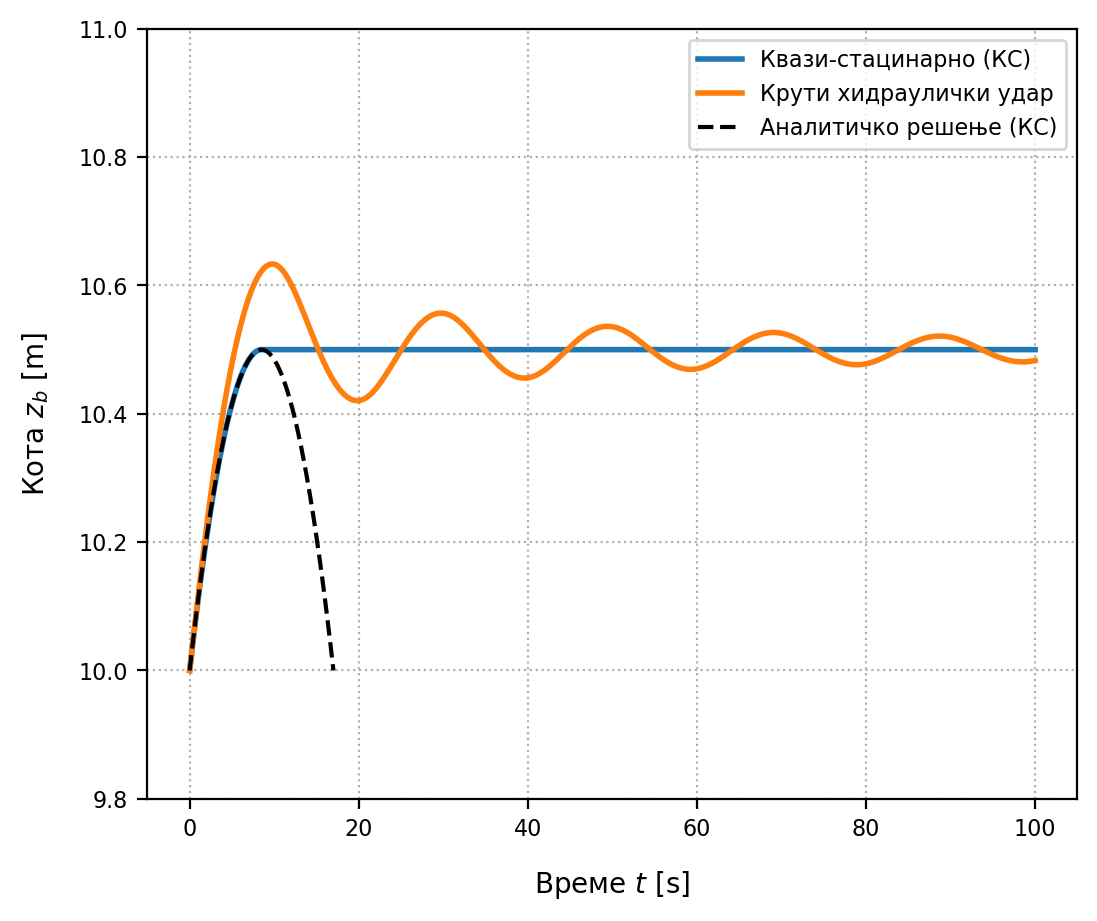

In [16]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 8})

g = 9.81
L = 15
D = 0.2
lam = 0.02
A = D**2 * np.pi/4
zR = 10.5


## Uticajni parametri
Ab = 0.2
zeta_v = 15
K = 8*(lam*L/D + zeta_v + 1)/(D**4 * np.pi**2)
lam_eff = lam + D/L*(zeta_v + 1)

def kvazi_stac(zb,t):
    Q = np.sign(zR-zb)*np.sqrt(g*np.abs(zR-zb)/K)
    rhs = Q/Ab 
    return rhs

def kruti_udar(y, t):
    zb, Q = y
    rhs = [Q/Ab,  g*A/L * (zR - zb) - 2*lam_eff/(D**3*np.pi)*Q*np.abs(Q)]
    return rhs
    
  
# Pocetni uslovi
zb0 = 10 
Q0 = np.sqrt(g*(zR - zb0)/K)
T = 2*Ab*np.sqrt(K*(zR-zb0)/g)
print ('Време потребно да се нивои изједначе (квазистационарни модел): Т =', T, '[s]' )  
# Vremenski opseg 
t = np.linspace(0, 100, 500) 
  
# Resenje diferencijalne jednacine
zb_ks = odeint(kvazi_stac, zb0, t) 


init_cond = [zb0, Q0]
y = odeint(kruti_udar, init_cond, t)
tp = np.linspace(0, 2*T, 50)
zbp = zb0 + (zR-zb0)*(2*tp/T - (tp/T)**2)

# plot results 
fig = plt.figure(figsize=(6,5), dpi=200)
ax = fig.add_subplot(111)
ax.set_xlabel("Време $t \, \, \mathrm{[s]}$", fontsize=10, labelpad=10)
ax.set_ylabel("Кота $z_b\,\, \mathrm{[m]}$", fontsize=10, labelpad=10)
ax.set_ylim(9.8,11)
plt.grid(True, linestyle='dotted')
plt.plot(t, zb_ks, lw=2, label='Квази-стацинарно (КС)')
plt.plot(t, y[:, 0], lw = 2, label='Крути хидраулички удар')
plt.plot(tp, zbp, linestyle='dashed', color='black', label = 'Аналитичко решење (КС)')
plt.legend()
plt.show()